# Milk_quality_prediction

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df_raw= pd.read_csv('milknew.csv')

In [38]:
df=df_raw.copy()

In [39]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Data Processing 

In [40]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [41]:
df.shape

(1059, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [43]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [44]:
df['Grade']=df['Grade'].map({'high':3, 'low':1, 'medium':2})

In [45]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,3
1,6.6,36,0,1,0,1,253,3
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


<AxesSubplot:>

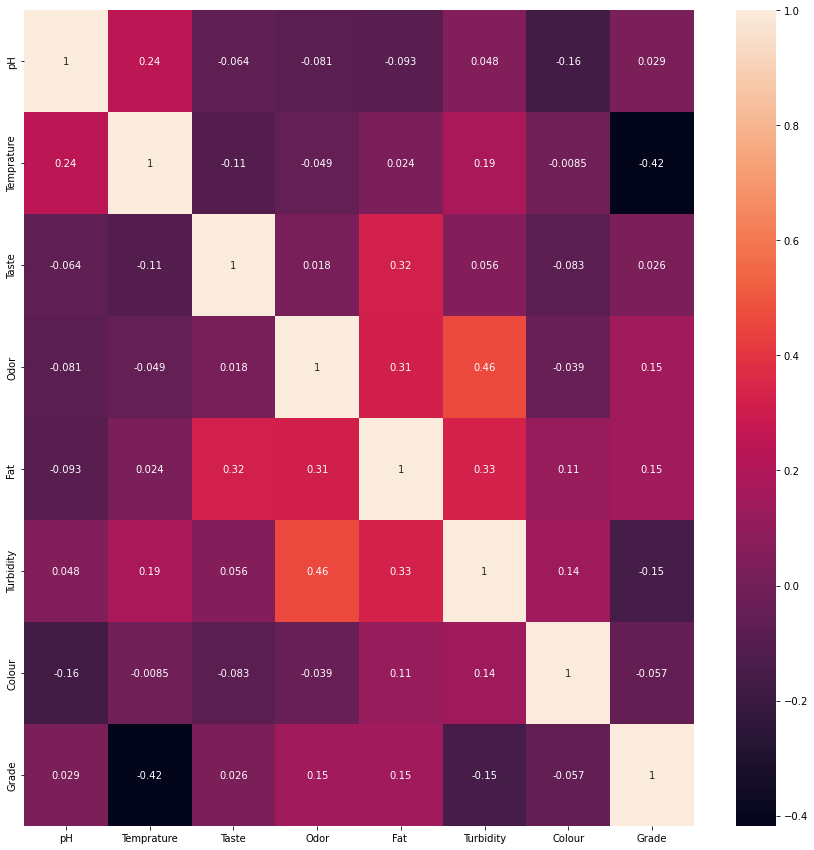

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

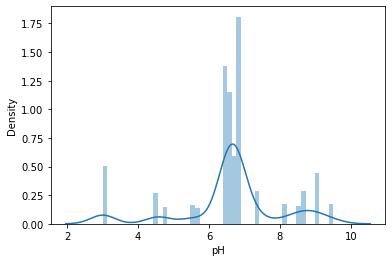

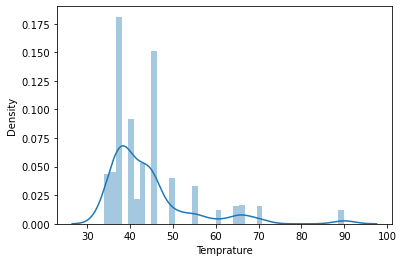

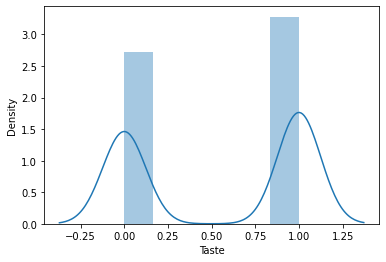

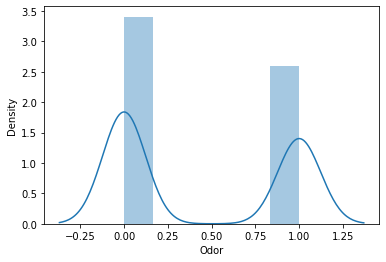

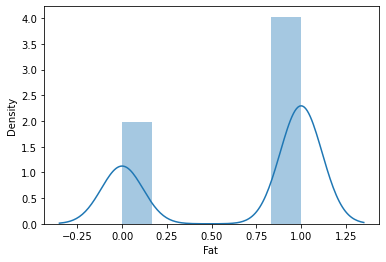

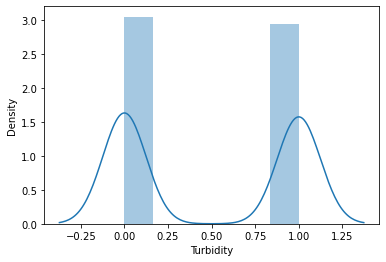

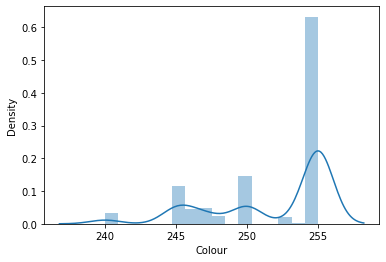

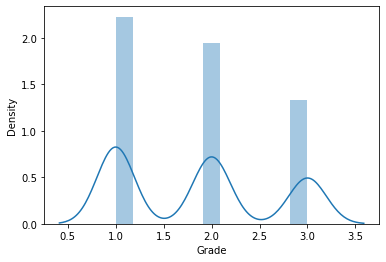

In [47]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

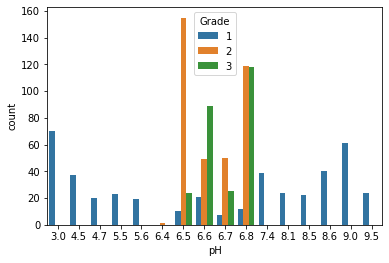

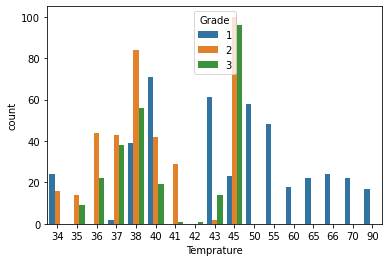

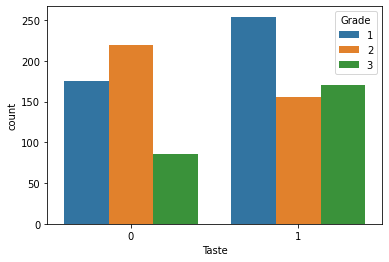

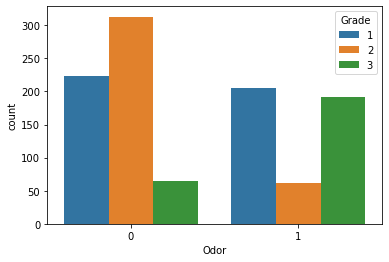

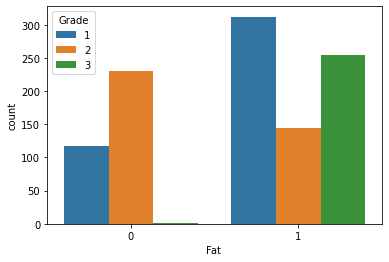

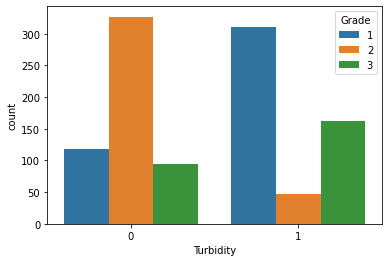

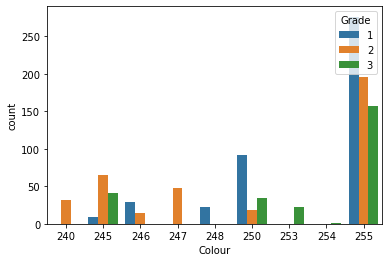

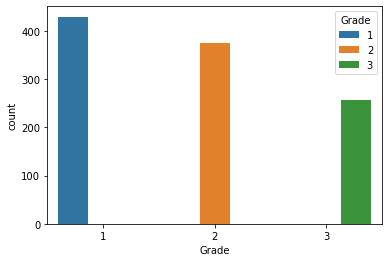

In [49]:
for i in df.columns:
    sns.countplot(df[i],hue=df['Grade'])
    plt.show()

## Outlier

In [50]:
from scipy import stats

In [51]:
df=df[np.abs(stats.zscore(df)<3).all(axis=1)]

In [52]:
df.shape

(1042, 8)

## Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X=df.drop('Grade',axis=1)
y=df['Grade']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Standard Scalar

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [57]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Models

## Random Forest

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [59]:
M1=RandomForestClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
accuracy=accuracy_score(y_test, P1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           2       1.00      1.00      1.00        70
           3       0.98      1.00      0.99        55

    accuracy                           1.00       209
   macro avg       0.99      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



[[83  0  1]
 [ 0 70  0]
 [ 0  0 55]]


Accuracy: 99.52%
ROC AUC Score 1.0


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
M3=DecisionTreeClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
accuracy=accuracy_score(y_test, P3)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M3.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           2       0.97      0.99      0.98        70
           3       0.98      0.98      0.98        55

    accuracy                           0.99       209
   macro avg       0.98      0.99      0.98       209
weighted avg       0.99      0.99      0.99       209



[[83  1  0]
 [ 0 69  1]
 [ 0  1 54]]


Accuracy: 98.56%
ROC AUC Score 0.9891242849875944


## Naive Bayes classifier

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
M4=GaussianNB()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
accuracy=accuracy_score(y_test, P4)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M4.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        84
           2       0.97      0.90      0.93        70
           3       0.87      1.00      0.93        55

    accuracy                           0.95       209
   macro avg       0.95      0.95      0.95       209
weighted avg       0.96      0.95      0.95       209



[[81  2  1]
 [ 0 63  7]
 [ 0  0 55]]


Accuracy: 95.22%
ROC AUC Score 0.9912974612045901


## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

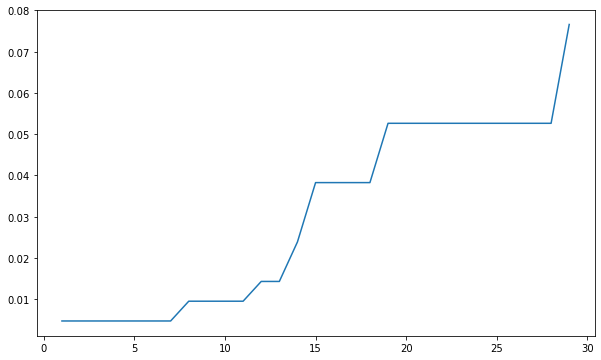

In [65]:
error_Mat=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range (1,30),error_Mat)

In [66]:
M5=KNeighborsClassifier(n_neighbors=1)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
accuracy=accuracy_score(y_test, P5)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           2       1.00      1.00      1.00        70
           3       0.98      1.00      0.99        55

    accuracy                           1.00       209
   macro avg       0.99      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



[[83  0  1]
 [ 0 70  0]
 [ 0  0 55]]


Accuracy: 99.52%
ROC AUC Score 0.9969336219336219


## Neural_network

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
M11=MLPClassifier(hidden_layer_sizes=(1000,))
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
accuracy=accuracy_score(y_test, P11)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        84
           2       1.00      0.99      0.99        70
           3       0.98      1.00      0.99        55

    accuracy                           0.99       209
   macro avg       0.99      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209



[[83  0  1]
 [ 1 69  0]
 [ 0  0 55]]


Accuracy: 99.04%
ROC AUC Score 0.9989923489779605


# All at one Place

In [69]:
Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'KNN', 
      'Neural_Network']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=1),
       MLPClassifier()]

In [70]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Random Forest Classifier,0.999984
Neural_Network,0.998944
KNN,0.996934
Naive Bayes classifier,0.991297
Decision Tree,0.989124
